# Part 1: Prediction with Hardcoded Model

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import time
import random

In [3]:
test = pd.read_csv("https://raw.githubusercontent.com/cs544-wisc/s23/main/p1/test.csv")
test_data = test.values
testX = torch.tensor(test_data[:, :10], dtype = torch.float32)
testY = torch.tensor(test_data[:, -1], dtype = torch.float32)

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/cs544-wisc/s23/main/p1/train.csv")
train_data = train.values
trainX = torch.tensor(train_data[:, :10], dtype = torch.float32)
trainY = torch.tensor(train_data[:, -1], dtype = torch.float32)

In [5]:
coef = torch.tensor([
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040], # POS_50_59_CP
        [0.0300], # POS_60_69_CP
        [0.0300],
        [0.0300],
        [0.0300]
], dtype=testX.dtype)

In [6]:
(testX[0] @ coef).item()

9.844000816345215

In [7]:
#torch.cuda.is_available()

# Part 2: R^2 Score

In [8]:
predictedY = (testX @ coef).flatten()

In [9]:
def r2_score(testY, predictedY):
    SStot = torch.dot( testY.mean()-testY, testY.mean()-testY )
    SSreg = torch.dot( predictedY-testY, predictedY-testY ) 
    improvement = SStot - SSreg
    return improvement/SStot
    

In [10]:
r2_score(testY, predictedY)

tensor(0.4110)

# Part 3: Optimization

In [11]:
x = torch.tensor(0.0, requires_grad=True)
y = x**2 - 8*x + 19
optimizer = torch.optim.SGD([x], lr=0.1)

tensor(0.8000, requires_grad=True) tensor(19., grad_fn=<AddBackward0>)
tensor(1.4400, requires_grad=True) tensor(13.2400, grad_fn=<AddBackward0>)
tensor(1.9520, requires_grad=True) tensor(9.5536, grad_fn=<AddBackward0>)
tensor(2.3616, requires_grad=True) tensor(7.1943, grad_fn=<AddBackward0>)
tensor(2.6893, requires_grad=True) tensor(5.6844, grad_fn=<AddBackward0>)
tensor(2.9514, requires_grad=True) tensor(4.7180, grad_fn=<AddBackward0>)
tensor(3.1611, requires_grad=True) tensor(4.0995, grad_fn=<AddBackward0>)
tensor(3.3289, requires_grad=True) tensor(3.7037, grad_fn=<AddBackward0>)
tensor(3.4631, requires_grad=True) tensor(3.4504, grad_fn=<AddBackward0>)
tensor(3.5705, requires_grad=True) tensor(3.2882, grad_fn=<AddBackward0>)
tensor(3.6564, requires_grad=True) tensor(3.1845, grad_fn=<AddBackward0>)
tensor(3.7251, requires_grad=True) tensor(3.1181, grad_fn=<AddBackward0>)
tensor(3.7801, requires_grad=True) tensor(3.0756, grad_fn=<AddBackward0>)
tensor(3.8241, requires_grad=True) tenso

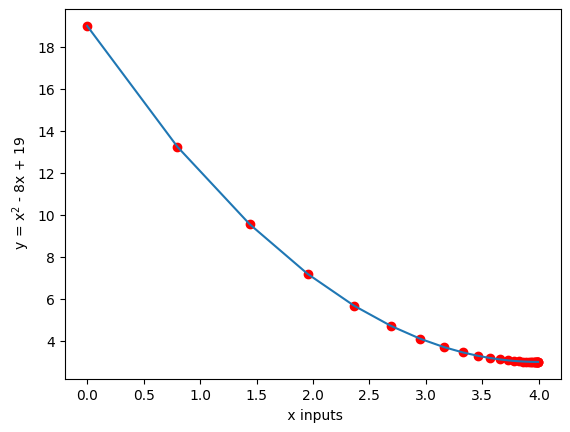

3.9950480461120605

In [12]:
graph={}
for epoch in range(30):
    optimizer.zero_grad()
    y = x**2 - 8*x + 19
    plt.plot(x.detach(), y.detach(), "ro")
    graph[x.detach().clone()]=y.detach() #clone changes values AND key
    y.backward()
    optimizer.step()
    print(x, y)
    
plt.plot(graph.keys(), graph.values())    
plt.ylabel(" y = $\mathregular{x^2}$ - 8x + 19")
plt.xlabel(" x inputs")
plt.show()

x.item()

# Part 4: Linear Regression

In [13]:
ds = torch.utils.data.TensorDataset(trainX, trainY.reshape(-1,1))
dl = torch.utils.data.DataLoader(ds, shuffle=True, batch_size=12)

In [14]:
model = torch.nn.Linear(10,1)
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD([model.weight, model.bias], lr=0.000001)

In [15]:
#testX @ model.weight.T + model.bias & model(testX) same

In [16]:
torch.manual_seed(0)

t1 = time.time()
for epoch in range(130):
    for batchx, batchy in dl:
        predy = model(batchx)
        loss = loss_fn(batchy, predy)
        #plt.bar(batchx.detach(), batchy.detach())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    x, y = ds[:]
    #print(loss_fn(y, model(x)) )
    
print(f'The trainging took {time.time()-t1}.')

The trainging took 4.299336194992065.


In [17]:
r2_score(testY, model(testX).flatten() )

tensor(0.5524, grad_fn=<DivBackward0>)

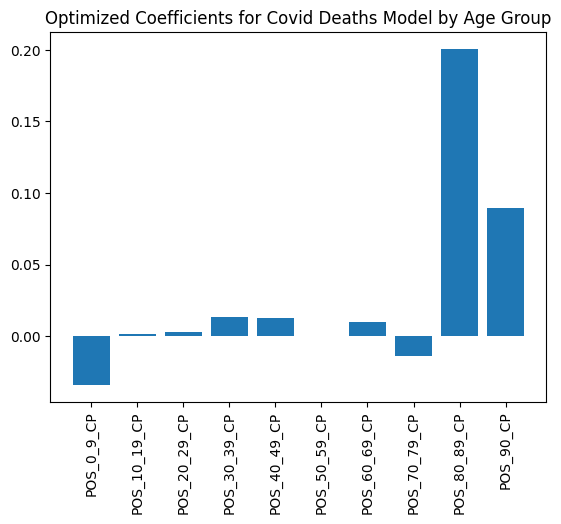

In [18]:
plt.bar(np.array(test.columns[:10]), (model.weight.detach().numpy()).flatten())
_ = plt.xticks(rotation='vertical')
_ = plt.title("Optimized Coefficients for Covid Deaths Model by Age Group")